# Machine Learning Math 1

In [ ]:
%matplotlib inline

from __future__ import print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

plt.style.use('seaborn-colorblind')

## Overview

### Branding DXP

We are currently marketing DXP as a digital transformation platform that enables omni-channel experiences and enriches customer relationship insight.

* [Digital Experience Platform](https://www.liferay.com/digital-experience-platform)

More explicitly, the following is how we elaborate each of those three attributes.

> Digital Transformation **Platform**
>
> * **Easy Integration**: Give customers secure access to information and apps hidden deep in your systems.
> * **Modular Services**: Quickly implement and evolve digital strategy with reusable and resilient services.
> * **Runtime Platform**: Support any digital business model with our resilient support for cloud and on-premise infrastructures.
>
> Omni Channel **Experiences**
>
> * **Modern Web**: Build web experiences with fast, usable interfaces customers will love.
> * **Mobile**: Create native apps and mobile sites with push notifications and camera and GPS.
> * **Digital Hybrid**: Enhance in-store experiences with digital context and services.
>
> Customer Relationship **Insight**
>
> * **Personalization and Segments**: Refine your understanding of your audience's needs and interests with targeted information and segment identification.
> * **Analytics and Metrics**: Help users get what they need. Use data to evolve touch points and increase click-through and conversion.
> * **Single View of the Customer**: Get a full understanding of what customers are doing across all touch points.

Neither of the first two deviate substantially from where Liferay lived in the portal space. We often look at both digital transformation and omni channel as a natural progression of portal, and we emphasize the natural-ness of that progression in our marketing and sales comparisons of portal heritage DXPs to other DXP variants. Our features list also emphasizes these capabilities.

* [Liferay DXP Features Overview](https://www.liferay.com/documents/10182/3292406/Liferay+DXP+Features+Overview/9d436cdd-3620-4bac-b06c-5342e97c8329)

However, the last is very different from where Liferay lived in the portal space, because insight isn't an organic extension of a portal at all. To uncover insight, you have to know where to look for it (what to ask), and you have to also be given guidance on how to conduct your search for your answers (how to find answers). In other words, you need to understand what an insightful question might be and how to frame the answers in a way that they generate insight.

So when building a DXP, its developers and maintainers and essentially everyone who engages our user base should be able to answer the following three questions:

1. What types of questions will our users try to ask with a DXP?
2. How will users attempt to use DXP and its data to answer those questions?
3. How will each of these different answers translate to insight?

### Workshop Focus

This series of workshops will focus on the second question, which itself centers around machine learning.

You've likely heard about machine learning as a concept, and solutions rooted in machine learning dominate the subtopics listed in [Gartner's 2016 Hype Cycle](http://www.gartner.com/newsroom/id/3412017).

We won't pretend that this series of workshops can provide a better crash course on performing machine learning than the existing Coursera, Udacity, EdX, or university open courseware on the topic. Instead, we'll look at machine learning at a more basic level, focusing on helping you better understand the questions that machine learning attempts to ask and the form that machine learning answers take.

Many machine learning courses begin with linear regression, because the end result is very easy to visualize in two dimensions. An added benefit is that due to its simplicity, it forces you to think carefully about the form of the data. You end up learning that choosing different data formats influences both the reliability of your machine learning model and even changes what your machine learning model actually predicts.

Given that 80% of data science involves getting your data into the right format (*data cleaning*), we too will start with linear regression. The focus in this first session will be on recognizing different types of variables and how these different variable types relate to *interpreting* a linear regression.

## Machine Learning Intuition

### Plain English

In a lot of computer science, we understand algorithms by assuming an oracle machine where you feed it with inputs and it produces the correct output every time. Essentially, black magic hiding inside of black boxes.

* [Oracle Machine](https://en.wikipedia.org/wiki/Oracle_machine)

Can we create something that isn't a black box that will produce the correct output every time? We can't be sure. Maybe no oracle machine can be built. Maybe building such an oracle machine is extremely complex and time-consuming.

What if we could step back and ask the question, "What if an almost-oracle is good enough?"

At a very abstract level, if we have many data points, we can theoretically summarize the data points with a model that says something meaningful or illuminating about the data. While it isn't necessarily 100% correct, this model can be used to understand both the data points that we've seen as well as data points we've not yet seen.

* [Obligatory George Box quote](https://en.wikipedia.org/wiki/All_models_are_wrong)

The process of creating these almost-oracles based on data points is known as machine learning.

In machine learning, you choose some class of models you have reason to believe will provide you with almost correct outputs given what you understand about the inputs. You feed your model with the input data, you provide some hints, and then you ask the model to train itself. By observing the outputs it creates, the model adjusts itself to provide increasingly correct answers as outputs.

* [The Great AI Awakening](http://www.nytimes.com/2016/12/14/magazine/the-great-ai-awakening.html)

### Math English

Let's start by pretending that you want to describe an object, say a house. To create this description, you will want to capture many aspects of the house. You might record values like the size of the house, the size of the backyard, the number of bedrooms and bathrooms in the house. Each of these values that you choose to collect is referred to as a *feature*.

Assume you have $m$ different objects that you've described with $n$ features. You can label the specific feature of a specific object as $x_{i,j}$, where $i$ corresponds to the ID of the object, and $j$ corresponds to the index of the feature. Conceptually, this allows us to represent these $m$ data points as an $m \times n$ matrix.

$$
\begin{bmatrix}
x_{1,1} & \cdots & x_{1,n} \\
x_{2,1} & \cdots & x_{2,n} \\
\vdots & \ddots & \vdots \\
x_{m,1} & \cdots & x_{m,n}
\end{bmatrix}
$$

Let's assume that there is an additional feature that is intuitively related to the features we collected. In our case, it might be the price of the house in question. Because we have $m$ different values for this additional feature, we can represent these as an $m \times 1$ column vector.

$$
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{bmatrix}
$$

So to repeat what we just said about the almost-oracles in a more mathematical way, machine learning is the process of taking an input matrix, performing various [matrix operations](https://en.wikipedia.org/wiki/Matrix_operation), and ultimately ending up with an output matrix. Taken together, the transformations serve as the almost-oracle.

* [Linear Algebra Review](http://www.deeplearningbook.org/contents/linear_algebra.html)

(Note that this is a simplification. In some instances the $n$ features are not just simple row vectors and are themselves be matrices, such as when representing images or relationship graphs. However, we'll cross that bridge in a future workshop after we've built up some more mathematical background.)

## Define the Task

Now that you know what machine learning is, the next step is to recognize that machine learning is a tool that serves to answer important questions. Therefore, the first step in machine learning is to decide what question you wish to answer.

To help you understand what these questions might look like in the real world, let's do some roleplay.

Something that happens occasionally in dramas is there will be an evil corporation that is looking to buy out neighborhoods in order to construct resorts or hotels that will pull in tourists and make lots of money for the corporation.

* [Princess Jellyfish](https://myanimelist.net/anime/8129/Kuragehime)

Imagine that you are an executive at one such evil hotel corporation, Hotelray.

You'd like to find places for your hotels that will make you a lot of money (surrounded by high value homes or tourist attractions) but wouldn't cost you very much money in terms of construction (low cost of labor, relatively inexpensive to buy out).

## Operationalize the Task

The next step is to identify what it is that you wish to predict in order to answer your question and identify data that you can bring together that might help in this prediction. This is known as *operationalizing the question*.

* [Operationalization](https://en.wikipedia.org/wiki/Operationalization)

We can answer a substantial amount of Hotelray's business question by simply finding out what the prices of the houses are. Unfortunately, not every house will publish their market value, and sending out an appraiser to every house of every possible neighborhood would be extremely expensive and most likely unwelcomed by the current residents.

However, an "almost-oracle" that had reasonable guesses about the price of every home would be good enough.

We're in luck! It turns out that we have data from the [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction), which is available from Kaggle data sets. If we can create a model that had reasonable guesses about the price of every home in that data set, it might also have reasonable guesses about every house in every neighborhood we're interested in.

I've taken advantage of the [CC0: Public Domain License](https://creativecommons.org/publicdomain/zero/1.0/) which permits copying the data set for any purpose, and I've pushed it to the static hosting service of [WeDeploy](https://www.wedeploy.com/) so it's accessible without sign-in.

In [ ]:
df = pd.read_csv('http://hosting.mlmath.wedeploy.io/kc_house_data.csv')

To summarize, our goal now is to create a model that will predict the prices of houses. From the machine learning perspective, we'd like to simply present the data to the model, and the model will figure out the appropriate way to guess at the price of our houses.

These are the features we have available:

In [ ]:
df.columns

Index([u'id', u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'zipcode', u'lat', u'long', u'sqft_living15', u'sqft_lot15'],
      dtype='object')

## Define Incorrectness

So, let's take a quick step back. You will be asking the model to train itself, and it will provide increasingly correct answers as outputs. How does the model know what to do in order to know how to get increasing correctness?

Essentially, it knows because you have a definition of "degree of incorrectness". In machine learning, this is referred to as a *cost function*.

* [Machine Learning Yearning, Chapters 8-9](https://gallery.mailchimp.com/dc3a7ef4d750c0abfc19202a3/files/Machine_Learning_Yearning_V0.5_01.pdf)

Intuitively, the cost function provides a way for the model to detect whether it got better or if it got worse.

There are a variety of considerations that you take into account when saying one model is better than another, but one of the more obvious elements of the cost function is the difference between what the model guessed $\hat{y_i}$ as compared to the true correct answer $y_i$.

The notion of a guess can vary between machine learning models. Some guess at a number in the range $(-\infty, +\infty)$. Some guess in a more bounded range, such as $[0, 1]$ or $[-1, 1]$. Still others might have multiple outputs. In all cases, you define your sense of right and wrong for any given example, and then you apply a function (sum and average are common) and declare that to be the degree of incorrectness of the model.

The simplest definition of right and wrong is binary. In this world, every incorrect answer is weighted equally. Either you got it exactly right or you got it wrong. As a cost function, this is known as **zero-one loss**.

$$
L(y_i, \hat{y_i}) =
\begin{cases}
0 & y = \hat{y_i} \\
1 & y \ne \hat{y_i}
\end{cases}
$$

Another simple definition is to take the absolute value of the difference between $y_i$ and $\hat{y_i}$. In this world, every incorrect answer is weighted according to how far away it was from the true value. As a cost function, this is known as **absolute loss**.

$$
L(y_i, \hat{y_i}) = | y_i - \hat{y_i} |
$$

One of the more common loss functions is to take the square of the difference between $y_i$ and $\hat{y_i}$. In this world, the farther you are away from the true value, the more dramatic the penalty for that incorrectness. As a cost function, this is known as **squared loss**.

$$
L(y_i, \hat{y_i}) = ( y_i - \hat{y_i} )^2
$$

### Checkpoint: Define Incorrectness

In our case, we are predicting the prices of houses. We don't expect to have this guess be perfect, but we'd like to penalize guesses that are way off.

Because we wish to penalize guesses differently based on how far off they are, we rule out zero-one loss. Because we would like our loss function to penalize really wrong guesses more heavily, **squared loss** makes more sense for us than absolute loss.

After summing the squared losses, we'll wind up with the sum of squared errors, or SSE.

$$
\text{SSE} = \sum\limits_{i=1}^m(y_i - \hat{y_i})^2
$$

However, this number is huge, and we aren't able to relate it back to what it is that we're predicting, so we don't have a good sense of just how wrong we are, just that smaller numbers are preferred. How can we fix that?

The first transformation is to compute the average of these squared differences rather than just their sum. This will give us the average of the squared errors, which reins in the values so that even if you add more data points, the value does not increase if the errors are about the same across the board. This transformation is known as the mean-square error, or MSE.

$$
\text{MSE} = \frac{\text{SSE}}{m} = \frac{1}{m} \sum\limits_{i=1}^m(y_i - \hat{y_i})^2
$$

If we have the average squared error, then if we take the square root, we have something that we can relate to our output value in a more obvious way. This transformation is known as root-mean-square error, or RMSE.

$$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{m} \sum\limits_{i=1}^m(y_i - \hat{y_i})^2}
$$

This is the number we will use to define the incorrectness of our model.

## Baseline Model

Once you've defined a cost function, all machine learning follows with the following question. What is the simplest almost-oracle I can think of related to this degree of incorrectness?

* [How to Get Baseline Results and Why They Matter](http://machinelearningmastery.com/how-to-get-baseline-results-and-why-they-matter/)

Answering this question gives you a meaningful starting point and it allows you to say whether your self-adjusting almost-oracle is actually any better than the simplest almost-oracle.

The simplest almost-oracle in many cases is simply always guessing the exact same value, no matter what the input values are. For that reason, you will often choose an almost-oracle that is equivalent to the central tendency measure connected to your definition of incorrectness.

* [Modes, Medians, Means: A Unifying Perspective](http://www.johnmyleswhite.com/notebook/2013/03/22/modes-medians-and-means-an-unifying-perspective/)

To summarize the article above:

* For zero-one loss, you would choose the mode of the output values as the baseline model.
* For absolute loss, you would choose the median of the output values.
* For squared loss, which encompasses the [sum of squared errors](https://en.wikipedia.org/wiki/Residual_sum_of_squares), the [mean squared error](https://en.wikipedia.org/wiki/Mean_squared_error), or the [root-mean-square error](https://en.wikipedia.org/wiki/Root-mean-square_deviation), you would choose the mean of the output values.

If you have a loss function that cannot be reduced to one of the above, you would consider other measures of central tendency for your baseline, or if you're extra ambitious, you can use the current best known solution to the problem as a baseline.

* [Central tendency](https://en.wikipedia.org/wiki/Central_tendency)

### Checkpoint: Create the Baseline Model

First, let's create our baseline model by computing the mean of all prices.

In [ ]:
baselineModel = df['price'].mean()
baselineModel

540088.14176652941

To put what this baseline model means in plain English, we have now created a model that will simply always guess that the price of the house is \$540,088 USD, no matter what.

Now that we have our baseline model, we'll want to compute the incorrectness of this baseline model. Since we chose RMSE as our degree of incorrectness measure, all we have to do is compute it. The first step is to find out how off we are, which we can compute simply by subtracting the true price $y_i$ and our model's guess $\hat{y_i}$.

In [ ]:
baselineModelPredictions = np.repeat([baselineModel], len(df))
baselineModelError = df['price'] - baselineModelPredictions

If we square each of these errors and compute the mean of the squared values, we will have the mean squared error, MSE. If we compute the square root of that, then we have the root mean squared error, RMSE.

In [ ]:
baselineModelSquaredError = baselineModelError ** 2
baselineModelRMSE = np.sqrt(baselineModelSquaredError.mean())
baselineModelRMSE

367118.70318137232

As a side note, in machine learning, it's important that you do not create a model based on the whole data set and then re-evaluate based on the same data set you used to create the model, which is what we did just now in creating a baseline model.

We're going to ignore that formality until we can explain the math behind why it's important, which won't be for a few more lessons.

## Linear Model Overview

When you choose linear regression as a model, you essentially say that the output variable is a linear combination of the input variables. More explicitly, we have a vector of *weights* that contains $n$ entries (for each of the features) and an additional intercept term $\beta_0$:

$$
\begin{bmatrix}
\beta_0 \\
\vdots \\
\beta_n
\end{bmatrix}
$$

If we were to take the numerical value we gave to each feature $x_{i,j}$ and multiply it by the corresponding $\beta_j$ and then sum these values along with the intercept term $\beta_0$, we have an estimate of the result variable $\hat{y_i}$. You can think of this both as a matrix multiplication with a 1-dimensional vector as a result or as a dot product producing a scalar value.

$$
\begin{bmatrix}
\hat{y_i}
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{i,1} & \cdots & x_{i,n}
\end{bmatrix}
\times
\begin{bmatrix}
\beta_0 \\
\vdots \\
\beta_n
\end{bmatrix}
$$

Choosing a linear regression model is equivalent to saying that we can estimate the output vector by transforming the input matrix with a single matrix multiplication.

$$
\begin{bmatrix}
\hat{y_1} \\
\hat{y_2} \\
\vdots \\
\hat{y_m}
\end{bmatrix}
=
\begin{bmatrix}
1 & x_{1,1} & \cdots & x_{1,n} \\
1 & x_{2,1} & \cdots & x_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x_{m,1} & \cdots & x_{m,n}
\end{bmatrix}
\times
\begin{bmatrix}
\beta_0 \\
\vdots \\
\beta_n
\end{bmatrix}
$$

## Linear Model Assumptions

Some of the basic assumptions you make with a linear model are summarized in the following discussion.

* [Linear Models](http://www.stat.berkeley.edu/~aditya/resources/LectureFOUR.pdf)

We'll go into the more advanced understanding of these assumptions in our next lesson, but for now, we will only rely on the simplest assumption, which is that we assume that the input variables $x_{i,j}$ are non-random and that the result variables $y_i$ are random.

* [Probability and Information Theory](http://www.deeplearningbook.org/contents/prob.html)

If the idea of a "random variable" as a statistical concept is unfamiliar to you, it's good to do a quick refresher of drawing samples from a probability distribution.

* [Chapter 1 of Introduction to Stochastic Processes](https://www.ma.utexas.edu/users/gordanz/notes/introduction_to_stochastic_processes.pdf)

Essentially, we assume that our measurements of each of the $x_{i,j}$ variables are precise values and are not random, but $y_i$ will vary from the model estimate $\hat{y_i}$ by an error term $\epsilon_i$.

In an ideal world where all of the linear model assumptions are satisfied, you can say something special about $\epsilon_i$, which is that while we don't actually expect our guesses to be exactly right, we will be wrong in a way that looks like a zero-mean random variable.

* [White Noise](https://en.wikipedia.org/wiki/White_noise#Mathematical_definitions)

We aren't going to assume ideal world today, so what we will instead say for now is that if we know that our $x_{i,j}$ values are non-random and our $y_i$ values are random, we can say that the true $y_i$ values relate to our model's guesses $\hat{y_i}$ values in the following way, though we know very little about the nature of $e_i$.

$$
\begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{bmatrix}
=
\begin{bmatrix}
\hat{y_1} \\
\hat{y_2} \\
\vdots \\
\hat{y_m}
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_m
\end{bmatrix}
$$

## Indicator/Boolean Variables

Our journey begins with the idea of an indicator variable, which is a variable whose only values are 0 and 1. If you're coming from a programming background, you can think of these as `false` and `true`, respectively.

When you include a boolean or indicator variable $x_{i,j}$ in a linear model, what you are effectively saying is that, all else being equal, we expect that activating the indicator value (setting it to 1 instead of 0) will result in a change in $y_i$ equal to the coefficient $\beta_j$.

### Checkpoint: Indicator/Boolean Variables

In our data set, the only boolean indicator variable is `waterfront`, which represents whether the house sits adjacent to a body of water.

Before you include a variable, you'll want to know if there are different values of the variable used with any frequency. The nice thing about boolean indicator variables is that because their values are 0 and 1, you can determine the frequency simply by computing the arithmetic average or mean.

In [ ]:
df['waterfront'].mean()

0.0075417572757136911

From the above, we know that waterfront properties comprise about 0.75% of the data set. So we won't expect that separating them out will make a huge difference in our predictive power, but we also know that it's not a complete waste of time.

The next thing we will want to know is if there is actually a difference between the result value when the variable is 0 vs. the result value when the variable is 1. There are mathematical ways to compare the two, but understanding those comparison approaches requires a lot more statistics than we're able to cover in a workshop. Instead, what we might do is use visualization to perform the comparison.

From the visualization perspective, you can plot histograms for each group and visually compare the distributions. However, histograms aren't going to be useful unless the two groups have similar counts, and we already know that the 0 value has 100 times more values than the 1 value.

Another common way to compare distributions is to normalize the counts by treating them as a materialization of the probability mass.

* [Khan Academy: Probability Density Function](https://www.khanacademy.org/math/statistics-probability/random-variables-stats-library/discrete-and-continuous-random-variables/v/probability-density-functions)

With that in mind, instead of plotting a histogram, you plot the kernel density estimate function. This effectively normalizes everything (everything sums to 1) and so you can actually make a meaningful comparison.

* [Kernel Density Estimate](http://research.cs.tamu.edu/prism/lectures/pr/pr_l7.pdf)

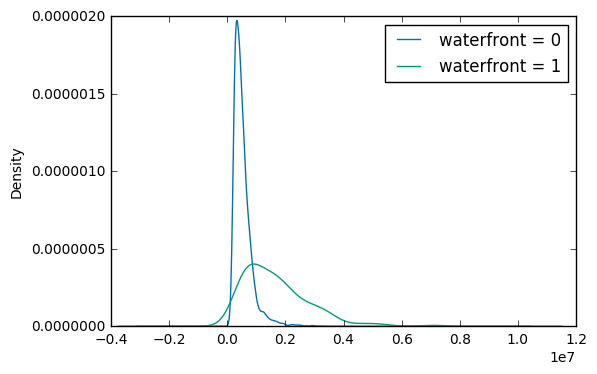

In [ ]:
for key, grp in df.groupby(['waterfront']):
    grp['price'].plot(kind='kde', label='waterfront = %d' % key)

plt.legend(loc='best')
plt.show()

From the visualization, we see that the concentration at the lower values is more pronounced for non-waterfront properties than for waterfront properties, which also gives us a sense that the two types of properties have fundamental price differences.

Another way to visualize this is to instead look at the cumulative probability mass instead of each individual probability mass. Going back to the calculus that you might still remember, you're going to look at the integral of the probability density function rather than its values at specific points.

* [Cumulative Distribution Function](http://itl.nist.gov/div898/handbook/eda/section3/eda362.htm)

However, computing integrals isn't something that everyone can readily conceptualize, so is there another way to give us similar information?

The answer, of course, is yes. You can approximate the cumulative density function by plotting points of interest at different quantiles (also known as percentiles) after we've divided the data into waterfront properties and non-waterfront properties.

* [Percentile](http://www.r-tutor.com/elementary-statistics/numerical-measures/percentile)

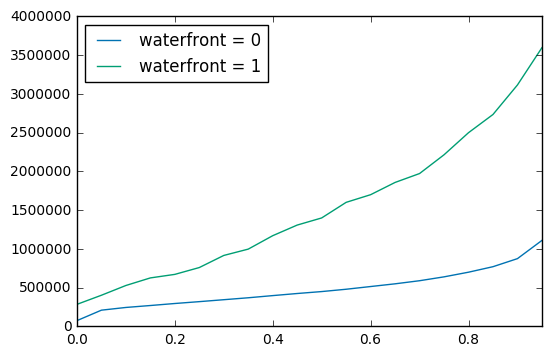

In [ ]:
quantiles = np.linspace(0, 0.95, 20)

for key, grp in df.groupby(['waterfront']):
    grp['price'].quantile(quantiles).plot(label='waterfront = %d' % key)

plt.legend(loc='best')
plt.show()

By looking at the different quantiles along the X axis, we can see that the data for non-waterfront properties shows a median of \$450,000 (the 0.5 or 50% quantile), while the prices for waterfront properties have a median of \$1,400,000 USD. The differences at other quantiles is also dramatic.

By looking at the different prices along the Y-axis, we can also identify what percentage of properties are equal to or less than that price value, just as you would if you had performed the integration of the probability density function.

Combining these two visualizations of how the price relates to whether or not a house is a waterfront property gives us confidence that there is some amount of $y_i$ that is explained by our $x_{i,j}$, and our model is likely to improve if we include the variable.

## Linear Regression, Take 1

When adding the `waterfront` variable to our regression, we effectively have the following regression, where $\beta_1$ is the change in $y_i$ we expect from activating the waterfront indicator variable, all else being equal, and $x_{i,1}$ is the value of our waterfront indicator variable.

$$
y_i = \widehat{\beta_0} + \widehat{\beta_1} x_{i,1} + \widehat{\epsilon_i}
$$

In [ ]:
take1Model = LinearRegression(fit_intercept=True)
take1Model.fit(X=df[['waterfront']], y=df['price'])

print('beta_0 = %f' % take1Model.intercept_)

for i, beta in enumerate(take1Model.coef_, start=1):
    print('beta_%d = %f' % (i, beta))

beta_0 = 531563.599814
beta_1 = 1130312.424726


Up until now, we haven't mentioned $\beta_0$ at all. So you might be wondering, aside from resembling an intercept term in a standard linear equation of $y = mx + b$, what does $\beta_0$ mean in English?

Think back to the matrix multiplication (more correctly a dot product...) used to define $\hat{y_i}$.

$$
\hat{y_i} =
\begin{bmatrix}
1 & x_{i,1} & \cdots & x_{i,n}
\end{bmatrix}
\times
\begin{bmatrix}
\beta_0 \\
\vdots \\
\beta_n
\end{bmatrix}
$$

It follows from the matrix multiplication that $\beta_0$ is the value we will predict for $\hat{y_i}$ when all of the $x_{i,j}$ values are 0. In this specific example, it is the value we will predict as the price of a house when it is not a waterfront property.

Now using one housing feature (waterfront or not waterfront), we have expanded our regression model to produce variable results.
This is a slight improvement to the previous baseline model that will always guess the same value (the output is always the mean,\$540,088 USD).
It will now output two values when guessing housing price, based on whether the house is on the waterfront of not.

Guess for a non-waterfront house:

$$
y_i = \widehat{\beta_0} + \widehat{\epsilon_i}
$$

Guess for a waterfront house:
$$
y_i = \widehat{\beta_0} + \widehat{\beta_1} x_{i,1} + \widehat{\epsilon_i}
$$


So what does this model actually say? It says that if a house is not a waterfront property, the model predicts that it will be \$531,563 USD, and if it is a waterfront property, the model predicts that it will be worth an additional \$1,130,312.

However, our regression is not that helpful because there many other features that could add or detract from a house's value.
This leads into the assessment of the model.

Next, we evaluate the model's performance compared to the baseline model.

In [ ]:
take1ModelPredictions = take1Model.predict(X=df[['waterfront']])
take1ModelError = df['price'] - take1ModelPredictions

take1ModelSquaredError = take1ModelError ** 2
take1ModelRMSE = np.sqrt(take1ModelSquaredError.mean())

baselineModelRMSE, take1ModelRMSE

(367118.70318137232, 353855.07535782689)

The RMSE is lowered very slightly. Since we're using RMSE as our measure of whether the model is improving, by our definition, our single-variable linear model using a single indicator variable provides a very slight improvement over our baseline model.

## Meaningful Numeric Variables

Our journey continues with the idea of numeric variables, which is a variable that has a much wider range than just 0 and 1 (it might even be all floating point numbers between 0 and 1). However, just because you have lots of values doesn't mean that all of those values are meaningful as numbers in the context of regression.

If a value $x_{i,j}$ is meaningful as a number in the context of regression, that means that when we include the numeric value $x_{i,j}$ in a linear model, all else being equal, we expect that an increase $\delta_k$ in $x_{i,j}$ will increase the value of $y_i$ by $\delta_k \beta_j$ for all values of $\delta_k$.

More explicitly, if we choose some $\delta_k$ to use as our increment, every time we increase $x_{i,j}$ by that increment $\delta_k$, we expect $y_i$ to change by the same amount $\delta_k \beta_j$ with each increment, subject to white noise. This constant increase for each unit increase is what makes linear regression "linear".

### Checkpoint: Meaningful Numeric Variables

## Less Meaningful Numeric Variables

### Checkpoint: Less Meaningful Numeric Variables

## Linear Regression, Take 2

Let's go ahead and expand our basic linear regression model to include $n$ variables (other variables could be features such as bedrooms, bathrooms, sqft_living, sqft_lot, floors, condition, yr_built, yr_renovated, zipcode, etc).

$$
  y_i = \widehat{\beta_0} + \widehat{\beta_1} x_1 + \dotsb + \widehat{\beta_n} x_n + \widehat{\epsilon_i}
$$
Starting off with some factors that we instictively know add and dectract value, let's first consider the square footage, bedrooms, and bathrooms.

## Really Wrong Answers

After you've got your first model that isn't a baseline model and you've determined that you've improved, the next step is to decide whether you should keep going or if you can stop (if you're familiar with blackjack, it's essentially like deciding whether you should hit or stand).

* [Machine Learning Yearning, Chapter 13](https://gallery.mailchimp.com/dc3a7ef4d750c0abfc19202a3/files/Machine_Learning_Yearning_V0.5_02.pdf)
* [Machine Learning Yearning, Chapter 14](https://gallery.mailchimp.com/dc3a7ef4d750c0abfc19202a3/files/Machine_Learning_Yearning_V0.5_03.pdf)

In this process, you look at samples where you scored poorly on your cost function and ask, "How can I update my model so that it doesn't do poorly on these examples?"

Perhaps there are features that you might simply be missing in your model. Perhaps you should adjust your cost function or more aggressively sample rare but important data points from your data set. Perhaps you simply need more examples with specific characteristics.

Put more explicitly, after each incremental improvement of your machine learning model, it's a good idea to evaluate your model in a way that's related to your cost function and determine if additional model refinement is achievable with the data you already have, and how much effort is involved in acquiring new data if it's not achievable.

### Checkpoint: Really Wrong Answers

## Transformed Variables

### Checkpoint: Transformed Variables

## Interaction Terms

### Checkpoint: Interaction Terms

## Linear Regression, Take 3

$$
y_i = \widehat{\beta_0} + \widehat{\beta_1} x_1 + \dotsb + \widehat{\beta_n} x_n + \widehat{\epsilon_i}
$$

## Applications: Search Scoring

Let's pretend you have tens of thousands of documents stored in a search index. When an end user enters a search query, what you'd like to do is list what will hopefully be a subset of those documents in a way that will make them feel relevant to the end user.

We can answer a substantial amount of the search question by simply filtering the documents down to just the subset that contain the terms entered by the end user. It's important to note that this may result in false negatives (because sometimes documents contain synonyms of words rather than exact words), but we will temporarily accept that as a limitation, because we'll need additional math in order to overcome it.

* [Elasticsearch Bool Query](https://www.elastic.co/guide/en/elasticsearch/reference/current/query-dsl-bool-query.html)

However, even acknowledging that there are false negatives, there may be thousands of documents that match, and you can't just blindly provide all the documents, because there's no way for the end user to consume that much information!

One solution that stands out is that maybe you can *summarize* them. Techniques include presenting summary statistics as numbers, presenting data visualizations that condense the results into graphs or other forms that humans can more readily interpret (such as rendering addresses as points on a map), or allowing the end user to "drill down" into the search results with facets.

* [Core Concepts in Data Analysis: Summarization, Correlation, and Visualization](https://www.researchgate.net/publication/232282057_Core_Concepts_in_Data_Analysis_Summarization_Correlation_and_Visualization)

However, this requires you to know a lot about the documents you're getting back, because as you've seen through this example of data exploration for linear regression, how you can summarize the information depends entirely on what kind of data it is.

What if we wanted a more generic way to respond to almost all queries? One such generic way to respond to the query is to provide the documents in descending order of *relevance*. This theoretically optimizes the time a user must spend finding the result, because the documents they need most will be presented to them immediately.

Relevance, however, is an abstract concept. You can't actually have the end user tell how they feel about each of your tens of thousands of documents, and even if you could, those values aren't static over time. If I searched for "liferay" back in 2007, I might expect to get results back on how to install Liferay Portal 4.4. If I searched for "liferay" today, I'd think that same document is not at all relevant to my interests.

So what can we do instead? We can create a *proxy* for relevance which we will call a *score*.

To summarize, our goal now is to create a model that will predict the appropriate *score* for each document, given the context of the search query that the user entered. In Elasticsearch, it turns out that this model is very close to being a *linear combination* of variables derived by performing sparse matrix multiplications of the query vector and the document vectors.

* [Elasticsearch Scoring Theory](https://www.elastic.co/guide/en/elasticsearch/guide/current/scoring-theory.html)

Once we advance our math further, we'll talk about these derived variables in more detail. However, among these variables is something we already understand now that we've finished regression: a *linear combination* of per-field subscores.

* [Elasticsearch Query-Time Boosting](https://www.elastic.co/guide/en/elasticsearch/guide/current/query-time-boosting.html)

Knowing that, how then can you find the appropriate boosting that will give you the desired ordering of search results?

From this exercise with linear regression, you might already have some ideas on how to derive a model that is predicting something based on a linear combination of weights, and you'll know how to make the model more meaningful by adding new explanatory variables.

Just one thing missing. In order to derive the weights (beyond gut instinct choices), you'll need to take a representative subset of your documents and a representative subset of your queries and manually score them in order to allow the model to have something to predict.

* [CACM Corpus](http://www.search-engines-book.com/collections/) (free)
* [Web Research Collections](http://ir.dcs.gla.ac.uk/test_collections/access_to_data.html) (non-free)

However, knowing how much work this is, you can also approximate score by instead simply providing a binary value to each document indicating is it relevant (using a subjective threshold of relevance). With this simpler data set, you would instead predict the probability that the document is relevant and use that as an approximation of a score.

In predicting the probability that something belongs to a class rather than predicting a raw score, we transform this from a classic linear regression to binary logistic regression.

* [Logistic Regression](https://onlinecourses.science.psu.edu/stat504/node/149)

## Additional Resources